# Simple Linear Regression

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

steps of model training
1)read data from file 

In [90]:
df = pd.read_csv("HeightWeightdataset - SOCR-HeightWeight.csv")

In [91]:
df.head()

,Height,Weight
0,66,113
1,72,136
2,69,153
3,68,142
4,68,144


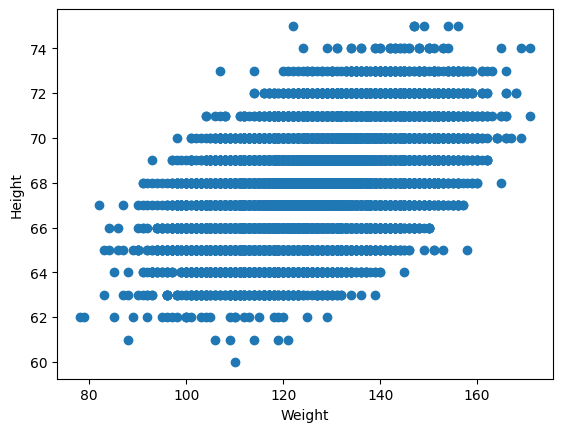

In [92]:
# scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


In [93]:
# make best fit line
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  25000 non-null  int64
 1   Weight  25000 non-null  int64
dtypes: int64(2)
memory usage: 390.8 KB


In [94]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [95]:
# EDA , fEATURE ENGINEERING

In [96]:
# DIVIDE THE FEATURE INTO INDEPENDENT & DEPENDENT FEATURE
X = df[['Weight']]   # independent
Y = df['Height']

In [97]:
X.shape,Y.shape

((25000, 1), (25000,))

In [98]:
# divide the training & testing data
from sklearn.model_selection import train_test_split

In [117]:
X_train ,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30, random_state = 42)

In [118]:
X_train.shape ,X_test.shape

((17500, 1), (7500, 1))

In [119]:
Y_train.shape ,Y_test.shape

((17500,), (7500,))

In [120]:
# 5) IN LINEAR REGRESSION standard scaling on train test data   to reach global minima  
# cost function - error to be computed   
# to reduce the scale - scaledown - to be in certain range of data like -3 to 3



In [121]:
from sklearn.preprocessing import StandardScaler 

In [122]:
scaler = StandardScaler() 

In [123]:
# for training data we use fit_transform ( zscore m mean or standard deviation calculate kr lega from x_train) 
#but for testing data we use only transform 
X_train =scaler.fit_transform(X_train)
X_train

array([[ 0.33835559],
       [ 0.68224285],
       [-1.03719345],
       ...,
       [-0.52136256],
       [ 0.76821466],
       [-0.34941893]])

In [124]:
X_test =scaler.transform(X_test)
X_test

array([[ 0.59627103],
       [-1.2951089 ],
       [ 0.76821466],
       ...,
       [-0.09150349],
       [ 0.68224285],
       [-1.2951089 ]])

In [125]:
# don't use standard scaler on y attribute as it is output variable


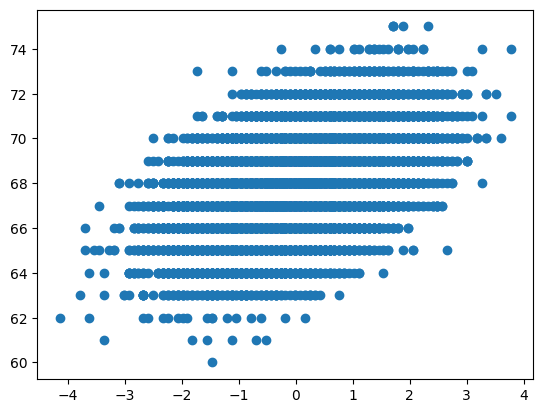

In [126]:
# scatter plot after standardscaler apply

plt.scatter(X_train ,Y_train)
# values of x_train reduces from 160 to 4

6) Model training

In [127]:
scaler.transform([[60]])

C:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-5.76564328]])

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
regressor = LinearRegression()

In [130]:
#training the train data
regressor.fit(X_train,Y_train)

LinearRegression()

In [131]:
regressor.intercept_

67.99891428571429

In [132]:
regressor.coef_

array([0.94711573])

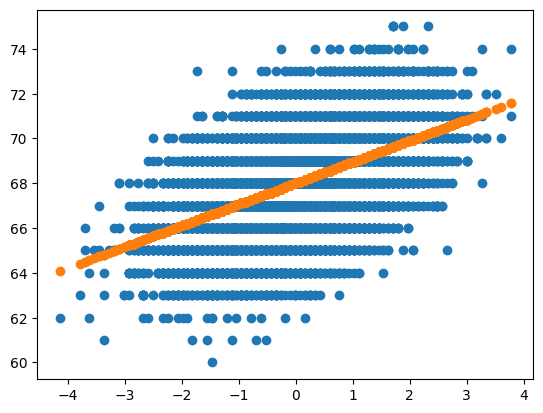

In [134]:
plt.scatter(X_train,Y_train)
plt.scatter(X_train,regressor.predict(X_train))

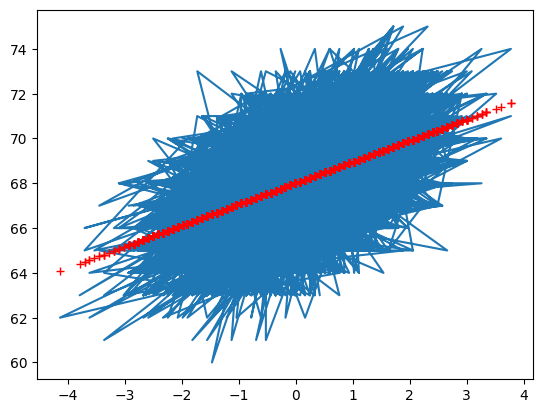

In [135]:
plt.plot(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r+')

In [ ]:
 # PREDICTON OF TRAINING DATA 
    1. PREDICTED HEIGHT OUTPUT = intercept + coef_(Weight)
    2. Y_pred_train = 67.9 + 0.94(X_test)

In [136]:
## prediction for test data
Y_pred_test = regressor.predict(X_test)


In [137]:
Y_pred_test

array([68.56365196, 66.77229627, 68.72650248, ..., 67.91224989,
       68.64507722, 66.77229627])

In [138]:
Y_test

6868     68
24016    68
9668     68
13640    69
14018    69
         ..
21156    68
24654    68
14592    65
20160    70
4731     65
Name: Height, Length: 7500, dtype: int64

In [141]:
# to check accuracy we will use performance metrics  -- mse, rmse ,MAE
## MSE 
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [142]:
mse = mean_squared_error(Y_test, Y_pred_test)
mae = mean_absolute_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.8184030601280385
1.3355596010295196
1.6788100131128711


##Accuracy of model check R'2 or adjusted R'2
R-squared or R2 or coefficients of determination is defined as the proportion of variation of data points explained 
by the regression line or model. 
It can be determined as a ratio of total variation of data points explained by the regression line (Sum of squared regression) and total variation of data points from the  mean (also termed as sum of squares total or total sum of squares). The following formula represents the ratio. y_hat represents the prediction or a point on the regression line, y_bar represents the mean of all the values and y_i represents the actual values or the points.

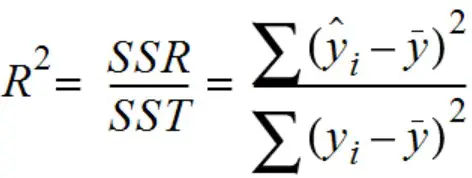


In [143]:
from sklearn.metrics import r2_score

In [144]:
score = r2_score(Y_test, Y_pred_test)
score

0.25190719393403027

#Adjusted R2 score 
R2adj=1−  [(1−R2)(n−1)/ n−k−1]
Where −

n
 = the number of points in your data sample.

k
 = the number of independent regressors, i.e. the number of variables in your model, excluding the constant.

In [145]:
##adjusted r2 
1 - ( 1- score)* (len(Y_test)-1) / (len(Y_test)- X_test.shape[1]-1)

0.25180742162060454

In [146]:
# Scaler model
# Regressor model are used here
pickiling to be done 
